---
# 1조
## 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라
### 조건1 : 각 후보별 순위 변동 없음,
### 조건 2 : 각 후보별 오차 1프로 이내,
### 조건 3 : 오차의 합이 최소인 지역 순서대로 정렬
### 실제 득표율 : 이재명 47.83, 윤석열 48.56, 심상정 2.37

In [50]:
election <- read.csv("../Data/election_2022.csv")
library(dplyr)
library(plotrix)

head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [51]:
vote <- cbind(광역시도 = election$광역시도, 시군구 = election$시군구,round(election[, 5:7] / election$투표수 * 100 ,2))

In [53]:
vote2 <- subset(vote, abs(이재명-47.83)<=1 & abs(윤석열-48.53)<=1 & abs(심상정-2.37)<=1 & 이재명<윤석열 )
vote2$오차 <- round(abs(vote2$이재명-47.83)+ abs(vote2$윤석열-48.53) + abs(vote2$심상정-2.37) , 2)
vote2 <- arrange(vote2, vote2$오차)
vote2

광역시도,시군구,이재명,윤석열,심상정,오차
대전광역시,유성구,47.05,48.19,2.81,1.56
인천광역시,미추홀구,47.08,47.81,2.74,1.84
인천광역시,동구,46.91,48.05,2.92,1.95
대전광역시,대덕구,46.90,47.80,2.72,2.01
충청북도,청주시흥덕구,47.01,47.62,2.91,2.27


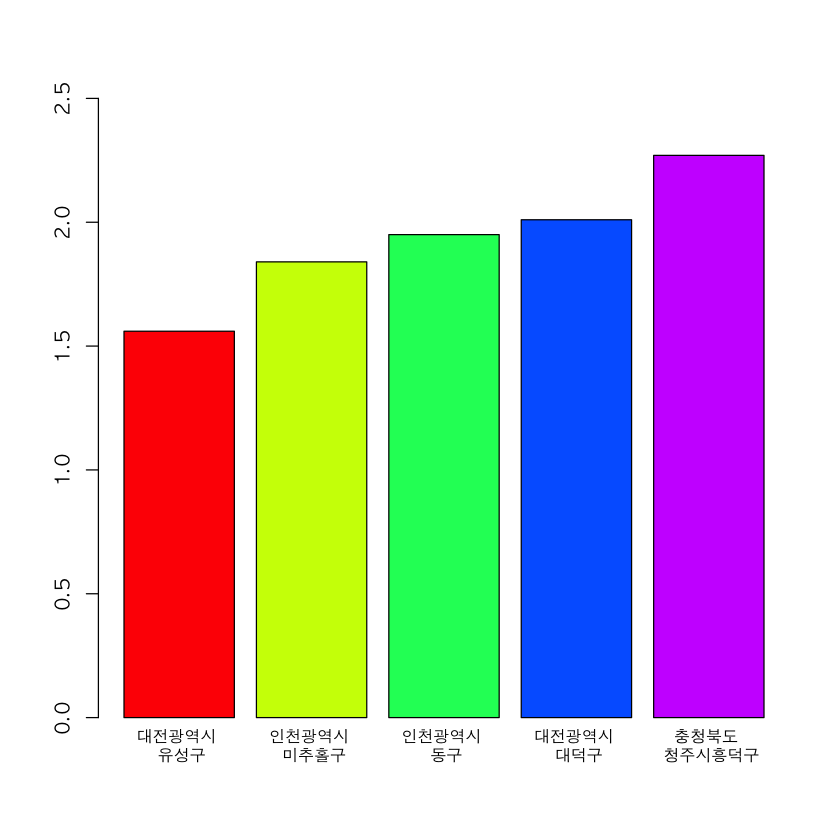

In [63]:
par(family = "AppleGothic")
options(warn = -1)
barplot(vote2$오차,
        ylim = c(0, 2.5),
        names = paste(vote2$광역시도,"\n", vote2$시군구),
        col = rainbow(5),
        cex.names = 0.8
       )

---
# 2조
## 투표율 75%가 넘는 지역에서 후보별 투표율 50%가 넘는 광역시별 합을 그래프로 그리기
## 투표율 : 전체투표수 / 선거인수
## 후보별 투표율 : 후보투표수/전체투표수

In [66]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [80]:
ratio <- election[, 1:2]
ratio$지역75 <- ifelse(round(election$투표수/election$선거인수 * 100, 2) >= 50, 1, 0)
ratio$이재명50 <- ifelse(round(election$이재명/election$투표수 * 100, 2) >= 50 & ratio$지역75 > 0, 1, 0)
ratio$윤석열50 <- ifelse(round(election$윤석열/election$투표수 * 100, 2) >= 50 & ratio$지역75 > 0, 1, 0)